In [1]:
# Importing necessary module for creating a database engine
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from urllib.parse import quote
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Correct variable definitions (no commas!)
user = "root"
passwd = quote("root@2002")  # encode special characters
host = "localhost"
database = "Card_manufacturing_analysis"

In [37]:
# Create SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{user}:{passwd}@{host}/{database}")

In [5]:
# SQL query
sql = 'select * from dataset_gsm_cards'

In [6]:
df = pd.read_sql_query(sql, con=engine)

In [ ]:
#first 5 rows
df.head()

In [ ]:
# shape of data
df.shape

In [ ]:
# finding data types
df.dtypes

In [ ]:
#finding null values
df.isnull().sum()

In [ ]:
# blanks
print((df == "").sum())  

In [38]:
# Convert column to numeric (turn blanks into NaN automatically)
df['No. of Quarter Cards'] = pd.to_numeric(df['No. of Quarter Cards'], errors='coerce')

# Fill NaN (including converted blanks) with 0
df['No. of Quarter Cards'] = df['No. of Quarter Cards'].fillna(0)


In [39]:
# blanks
print((df == "").sum()) 

Batch ID                                    0
Job Order Number                            0
Printing Date/Time                          0
Printer Operator ID                         0
Ink Type                                    0
Paper Type                                  0
No. of Sheets Used                          0
No. of Cards Printed                        0
No. of Half Cards                           0
No. of Quarter Cards                        0
Accepted Cards                              0
Rejected Cards                              0
Color Matching Data                         0
Quality Control Result (Printing)           0
Printing QC - Alignment                     0
Printing QC - Color Accuracy                0
Printing QC - Material Integrity            0
Lamination Date/Time                        0
Lamination Operator ID                      0
Chip Type                                   0
Embedding Errors                            0
Chip Serial Numbers               

In [ ]:
# finding duplicates in data fr
df.duplicated().sum()

In [45]:
duplicate_indexes = df[df.duplicated(keep=False)].index
print("Indexes of duplicated rows:", duplicate_indexes.tolist())

Indexes of duplicated rows: []


In [46]:
df = df.drop_duplicates()  # keeps first occurrence, removes duplicates
df.duplicated().sum()

0

In [47]:
#descibe or summary
df.describe()

,Printing Date/Time,No. of Sheets Used,No. of Cards Printed,No. of Half Cards,No. of Quarter Cards,Accepted Cards,Rejected Cards,Lamination Date/Time,Embedding Errors
count,1500,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500,1500.000000
mean,2022-06-17 04:45:26.279999744,30.246667,846.032667,360.714250,492.272083,524.812000,295.604667,2022-06-21 14:10:54.400000256,1.964000
min,2022-01-01 00:00:00,10.000000,314.000000,10.000000,0.000000,180.000000,1.000000,2022-01-02 11:41:00,0.000000
25%,2022-01-01 11:41:00,20.000000,725.000000,38.000000,179.000000,333.000000,180.750000,2022-01-02 11:41:00,1.000000
50%,2022-05-07 08:58:30,31.000000,780.000000,295.000000,534.500000,479.000000,268.000000,2022-05-12 08:52:30,2.000000
75%,2022-11-05 20:58:15,38.000000,999.000000,545.250000,753.000000,645.000000,371.500000,2022-11-12 18:54:45,3.000000
max,2024-01-01 16:49:00,49.000000,1410.000000,1304.875000,1613.625000,1113.000000,655.000000,2024-01-02 09:38:00,4.000000
std,NaN,11.117864,287.776947,332.783149,321.822732,240.926762,181.973832,NaN,1.396187


In [ ]:
df.info()

In [43]:
df.describe(include='all').T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Batch ID,1500,1500,Batch_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job Order Number,1500,1500,JO_00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Printing Date/Time,1500,NaN,NaN,NaN,2022-06-17 04:45:26.279999744,2022-01-01 00:00:00,2022-01-01 11:41:00,2022-05-07 08:58:30,2022-11-05 20:58:15,2024-01-01 16:49:00,NaN
Printer Operator ID,1500,51,Operator_43,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ink Type,1500,5,Metallic Ink,833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paper Type,1500,4,PET,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No. of Sheets Used,1500.0,NaN,NaN,NaN,30.246667,10.0,20.0,31.0,38.0,49.0,11.117864
No. of Cards Printed,1500.0,NaN,NaN,NaN,846.032667,314.0,725.0,780.0,999.0,1410.0,287.776947
No. of Half Cards,1500.0,NaN,NaN,NaN,360.71425,10.0,38.0,295.0,545.25,1304.875,332.783149
No. of Quarter Cards,1500.0,NaN,NaN,NaN,492.272083,0.0,179.0,534.5,753.0,1613.625,321.822732


In [49]:
df['Printing Date/Time'] = pd.to_datetime(df['Printing Date/Time'], errors='coerce')
df['Lamination Date/Time'] = pd.to_datetime(df['Lamination Date/Time'], errors='coerce')

categorical_cols = ['Ink Type', 'Paper Type', 'Printer Operator ID',
                    'Lamination Operator ID', 'Chip Type', 
                    'Personalization Operator ID', 'PO_number']

for col in categorical_cols:
    df[col] = df[col].astype('category')
    df[col]

In [9]:
# Univariate Analysis
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create summary DataFrame
univariate_summary = pd.DataFrame({
    'Mean': df[num_cols].mean(),
    'Median': df[num_cols].median(),
    'Mode': df[num_cols].mode().iloc[0]
})

print("Univariate Analysis (Mean, Median, Mode):\n")
print(univariate_summary)

Univariate Analysis (Mean, Median, Mode):

                            Mean  Median   Mode
No. of Sheets Used     30.237683    31.0   37.0
No. of Cards Printed  869.896804   780.0  780.0
No. of Half Cards     362.599201   295.0   27.0
No. of Quarter Cards  501.392810   535.0  753.0
Accepted Cards        534.151132   479.0  330.0
Rejected Cards        329.259654   268.0  268.0
Embedding Errors        1.964714     2.0    1.0


In [10]:
# Specify the categorical columns you want to analyze
categorical_cols = ['Printer Operator ID', 'Ink Type', 'Paper Type',
                    'Lamination Operator ID', 'Chip Type',
                    'Personalization Operator ID', 'PO_number']

# Create summary DataFrame with Mode and Frequency
categorical_summary = pd.DataFrame({
    'Mode': [df[col].mode().iloc[0] if not df[col].mode().empty else None for col in categorical_cols],
}, index=categorical_cols)

# Print the summary
print("\nCategorical Columns Summary (Mode and Frequency):\n")
print(categorical_summary)



Categorical Columns Summary (Mode and Frequency):

                                     Mode
Printer Operator ID           Operator_43
Ink Type                     Metallic Ink
Paper Type                            PET
Lamination Operator ID        Operator_83
Chip Type                           Type3
Personalization Operator ID  Operator_127
PO_number                         PO-0032


In [11]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

categorical_summary = pd.DataFrame({
    'Mode': [df[col].mode().iloc[0] if not df[col].mode().empty else None for col in cat_cols],
}, index=cat_cols)

print("\n Categorical Columns Summary (Most Frequent Value and Count):\n")
print(categorical_summary)



 Categorical Columns Summary (Most Frequent Value and Count):

                                                  Mode
Batch ID                                    Batch_1425
Job Order Number                              JO_01425
Printer Operator ID                        Operator_43
Ink Type                                  Metallic Ink
Paper Type                                         PET
Color Matching Data                         Match_Fair
Quality Control Result (Printing)                 Pass
Printing QC - Alignment                           Pass
Printing QC - Color Accuracy                      Pass
Printing QC - Material Integrity                  Pass
Lamination Operator ID                     Operator_83
Chip Type                                        Type3
Chip Serial Numbers                        Chip_637795
Quality Control Result (Embedding)                Pass
Embedding QC - Chip Functionality                 Pass
Embedding QC - Alignment                          Pass
N

In [12]:
#Univariate Analysis
for col in ["No. of Sheets Used","No. of Cards Printed", "No. of Half Cards","No. of Quarter Cards", "Accepted Cards","Rejected Cards"]:
    # Ensure numeric type
    df[col] = pd.to_numeric(df[col], errors="coerce")
    var = df[col].var()           # Variance
    std = df[col].std()           # Standard Deviation
    rng = df[col].max() - df[col].min()  # Range

    print(f"{col}:")
    print(f"   Variance : {var}")
    print(f"   Std Dev  : {std}")
    print(f"   Range    : {rng}")
    print()

No. of Sheets Used:
   Variance : 123.59903207005388
   Std Dev  : 11.11751015605805
   Range    : 39

No. of Cards Printed:
   Variance : 156850.19653874854
   Std Dev  : 396.0431750942674
   Range    : 5800

No. of Half Cards:
   Variance : 115822.47349702979
   Std Dev  : 340.32700964958656
   Range    : 1860

No. of Quarter Cards:
   Variance : 152143.4431994301
   Std Dev  : 390.0556924330551
   Range    : 5425.0

Accepted Cards:
   Variance : 72054.87987546697
   Std Dev  : 268.4304004308509
   Range    : 1531

Rejected Cards:
   Variance : 106005.32494005474
   Std Dev  : 325.5845895309769
   Range    : 5463



In [13]:
#skewness
from scipy.stats import skew

columns = ["No. of Sheets Used","No. of Cards Printed", "No. of Half Cards",
           "No. of Quarter Cards", "Accepted Cards","Rejected Cards"]

for col in columns:
    data = df[col].dropna()  # remove nulls
    col_skewness = skew(data)
    print(f"{col} - Skewness: {col_skewness:.2f}")


No. of Sheets Used - Skewness: -0.09
No. of Cards Printed - Skewness: 4.26
No. of Half Cards - Skewness: 1.07
No. of Quarter Cards - Skewness: 3.85
Accepted Cards - Skewness: 1.35
Rejected Cards - Skewness: 6.60


In [14]:
#kurtosis
from scipy.stats import kurtosis

for col in ["No. of Sheets Used","No. of Cards Printed", "No. of Half Cards","No. of Quarter Cards", "Accepted Cards","Rejected Cards"]:
    data = df[col].dropna()
    kurt = kurtosis(data)
    print(f"{col} - Kurtosis: {kurt}")

No. of Sheets Used - Kurtosis: -1.022719831104383
No. of Cards Printed - Kurtosis: 43.47484680185681
No. of Half Cards - Kurtosis: 0.7914872925994922
No. of Quarter Cards - Kurtosis: 42.37284156088517
Accepted Cards - Kurtosis: 2.1480238611970703
Rejected Cards - Kurtosis: 80.823073942996


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


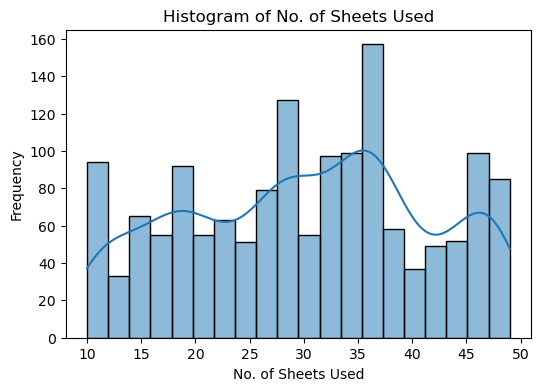

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


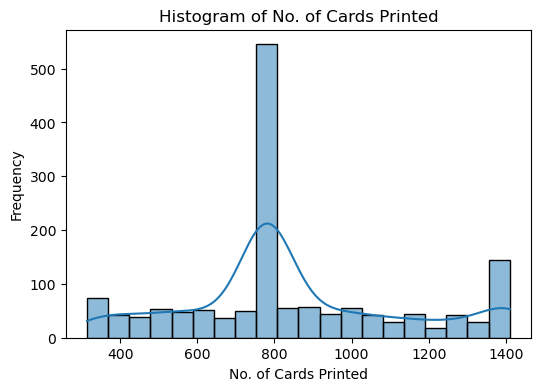

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


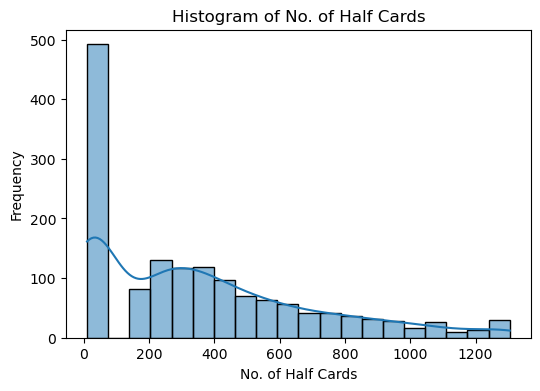

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


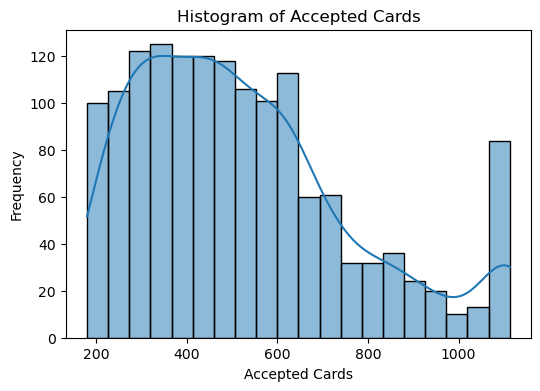

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


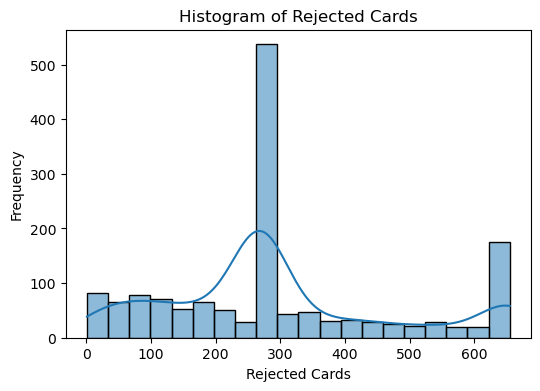

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


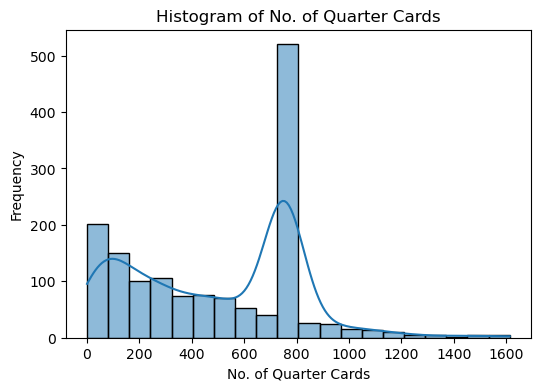

In [36]:
#Histogram
numeric_cols = ['No. of Sheets Used', 'No. of Cards Printed', 'No. of Half Cards', 
                'Accepted Cards', 'Rejected Cards','No. of Quarter Cards']

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


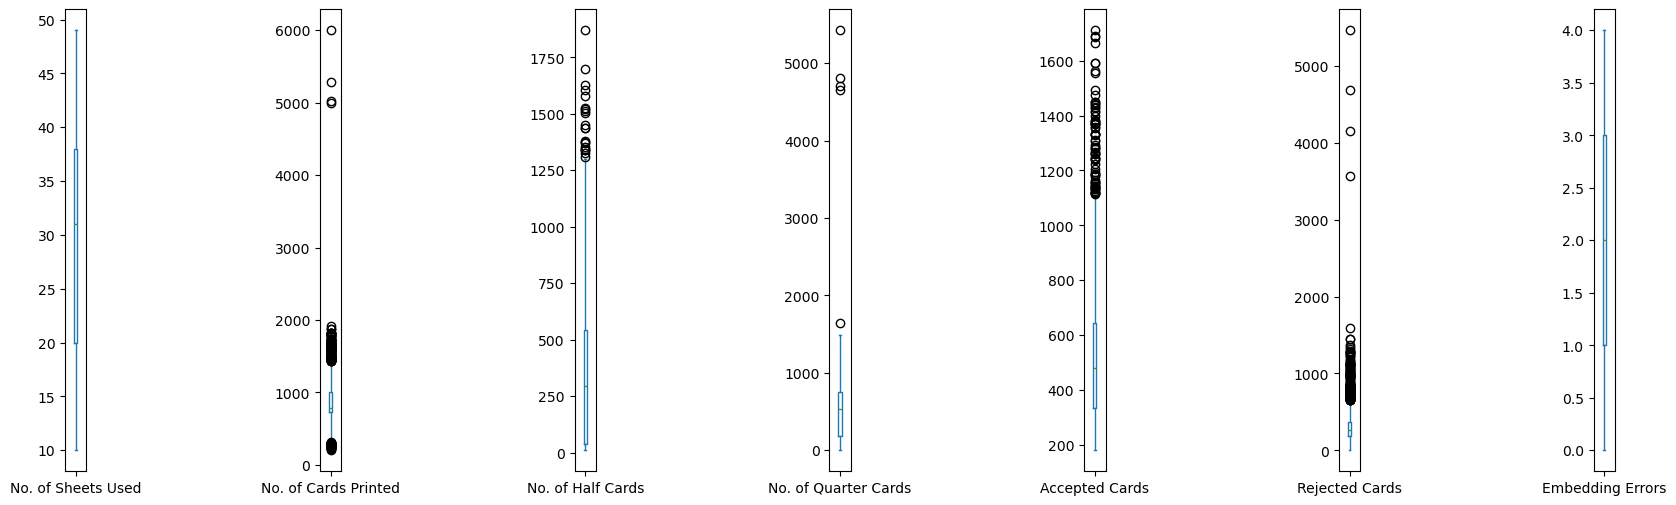

In [16]:
# detecting outliers using sub boxplot
df.plot(kind = 'box', subplots= True, sharey = False, figsize =(20,6))
plt.subplots_adjust(wspace = 10.85)
plt.show()

In [17]:
# Step 1: Select only numerical columns
numeric_cols = df.select_dtypes(include='number').columns

# Step 2: Calculate IQR, lower limit, and upper limit for each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    print(f'Column: {col}')
    print(f'  IQR: {IQR}')
    print(f'  Lower Limit: {lower_limit}')
    print(f'  Upper Limit: {upper_limit}')
    print('---')

Column: No. of Sheets Used
  IQR: 18.0
  Lower Limit: -7.0
  Upper Limit: 65.0
---
Column: No. of Cards Printed
  IQR: 274.0
  Lower Limit: 314.0
  Upper Limit: 1410.0
---
Column: No. of Half Cards
  IQR: 506.75
  Lower Limit: -722.125
  Upper Limit: 1304.875
---
Column: No. of Quarter Cards
  IQR: 573.75
  Lower Limit: -681.375
  Upper Limit: 1613.625
---
Column: Accepted Cards
  IQR: 312.0
  Lower Limit: -135.0
  Upper Limit: 1113.0
---
Column: Rejected Cards
  IQR: 189.5
  Lower Limit: -103.0
  Upper Limit: 655.0
---
Column: Embedding Errors
  IQR: 2.0
  Lower Limit: -2.0
  Upper Limit: 6.0
---


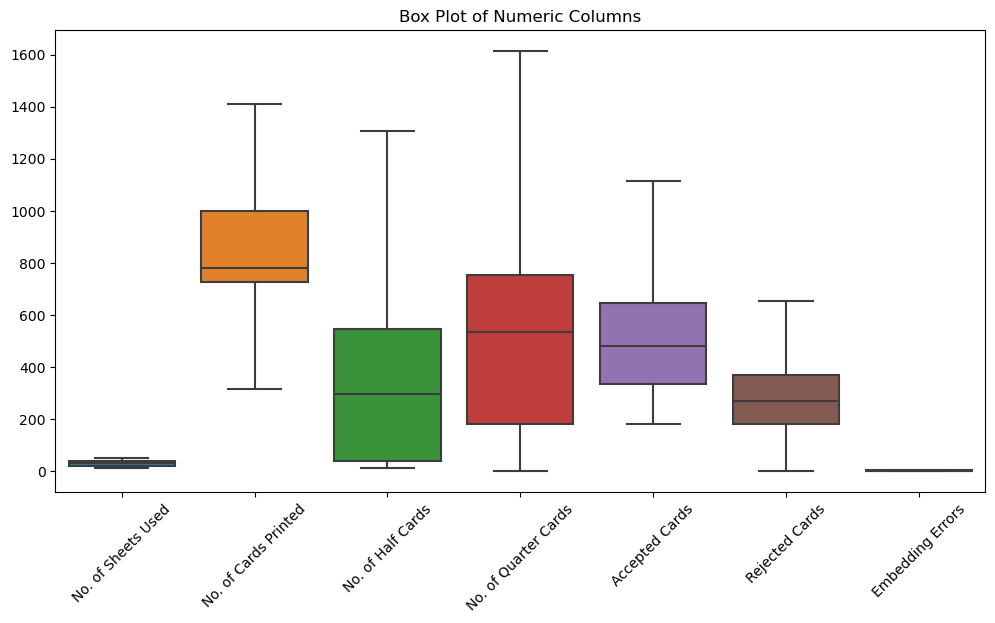

In [34]:
# Step 2: Select only numeric columns
numeric_cols = ['No. of Sheets Used', 'No. of Cards Printed', 'No. of Half Cards',
                'No. of Quarter Cards', 'Accepted Cards', 'Rejected Cards', 'Embedding Errors']

# Step 3: Apply Winsorizer using IQR method
winsor_iqr = Winsorizer(
    capping_method='iqr',   # Use IQR rule
    tail='both',            # Cap both lower and upper tails
    fold=1.5,               # 1.5 times IQR (Tukey’s rule)
    variables=numeric_cols  # Columns to apply
)

# Step 4: Fit and transform
df[numeric_cols] = winsor_iqr.fit_transform(df[numeric_cols])

# Step 5: Visualize the effect using boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title('Box Plot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()


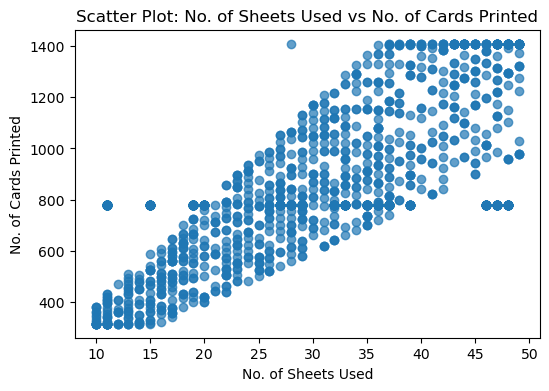

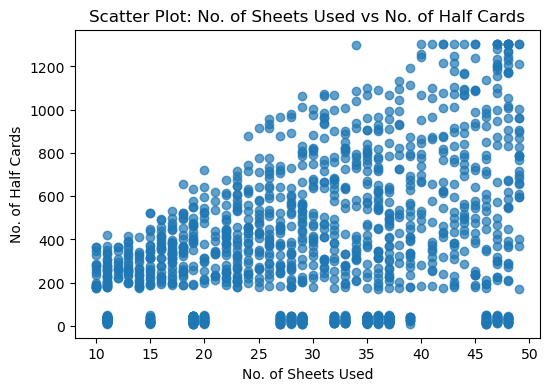

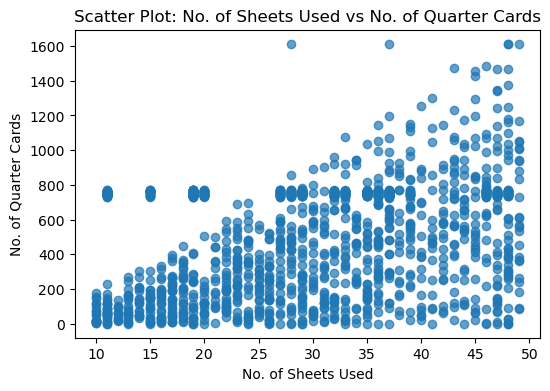

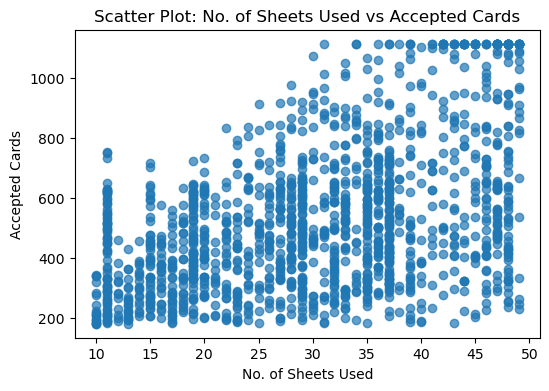

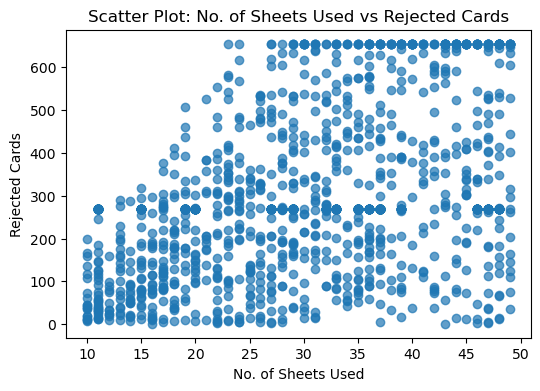

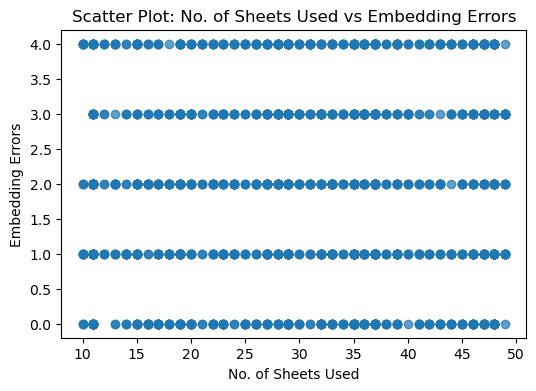

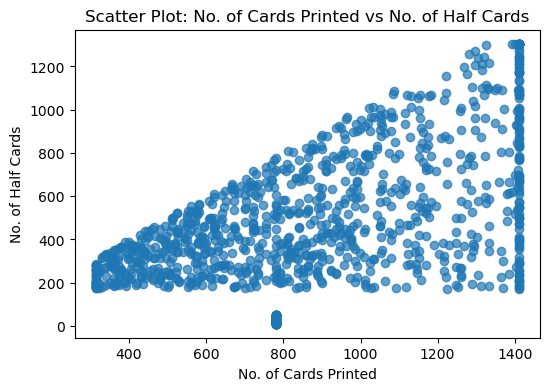

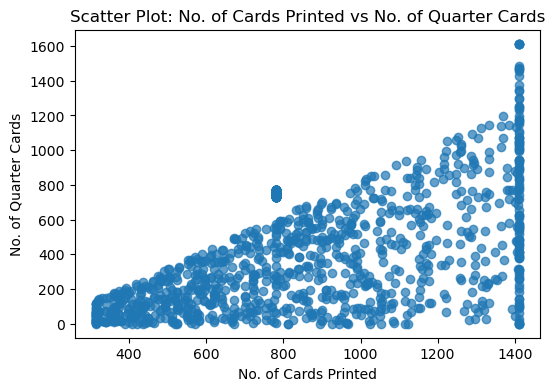

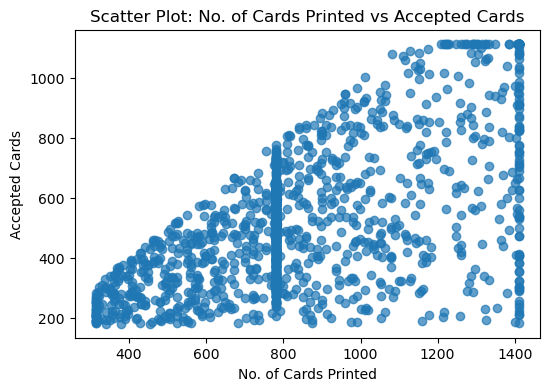

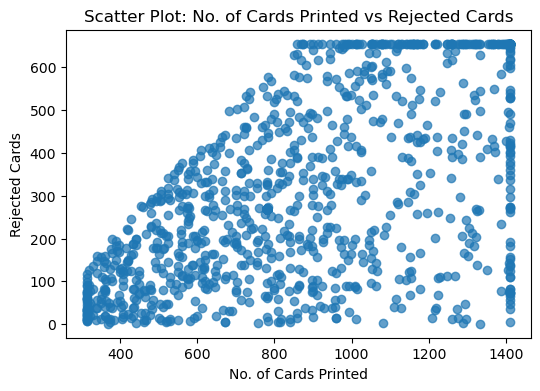

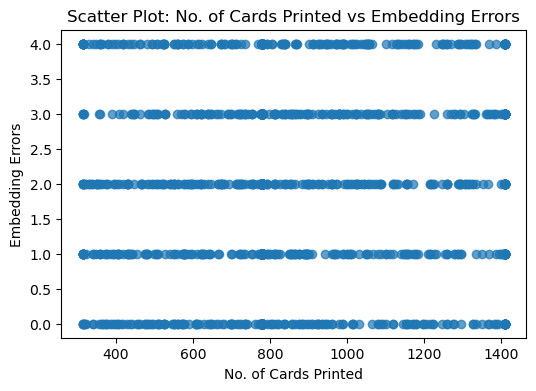

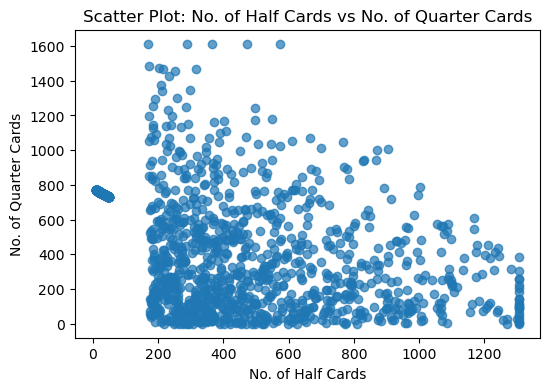

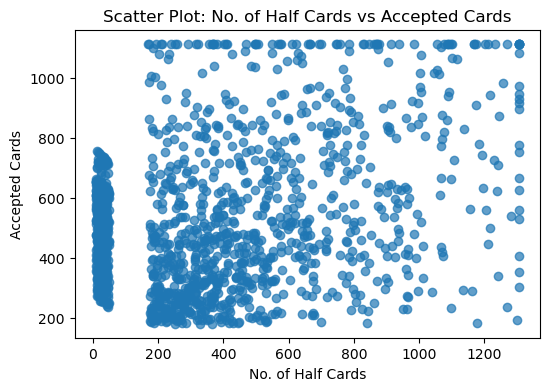

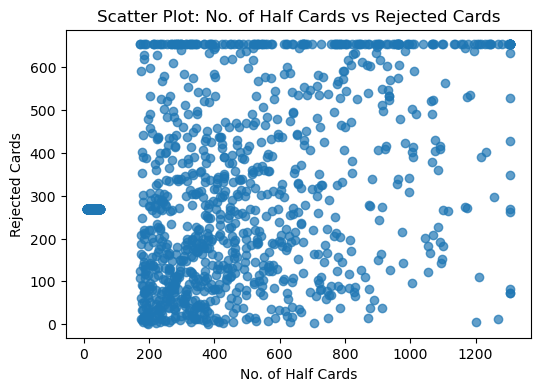

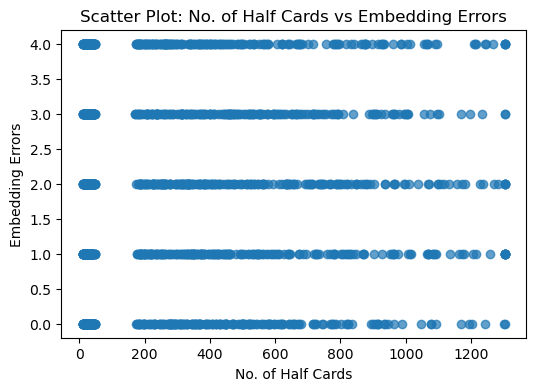

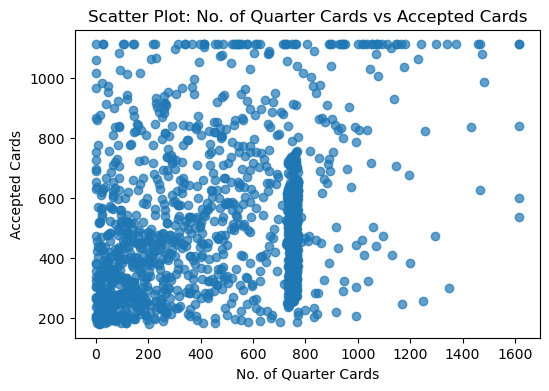

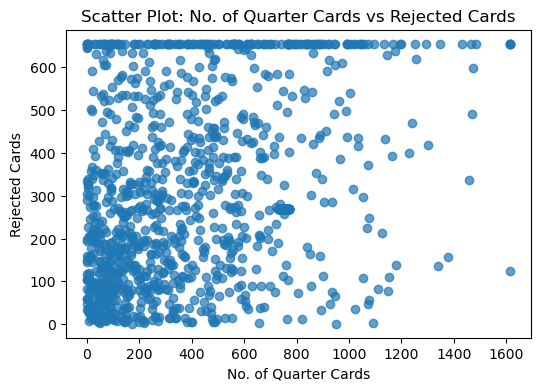

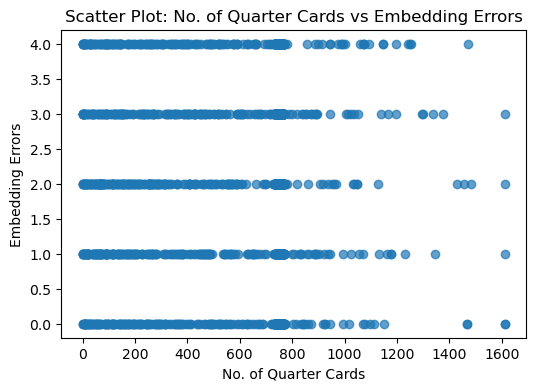

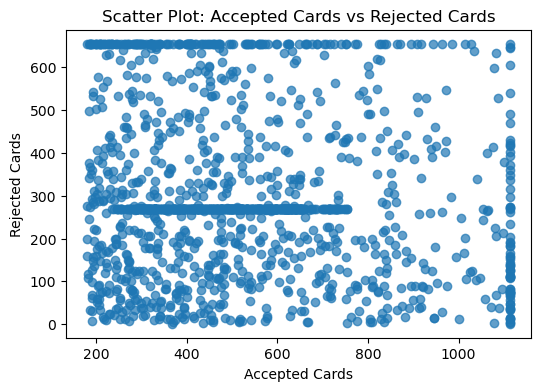

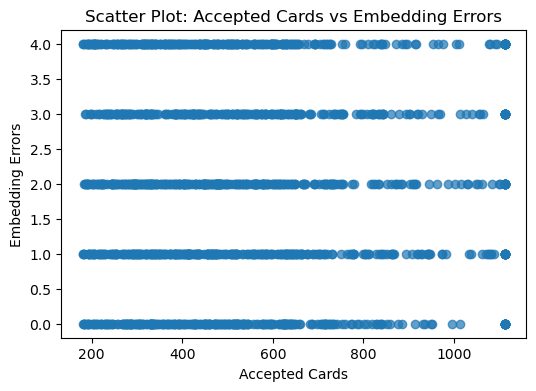

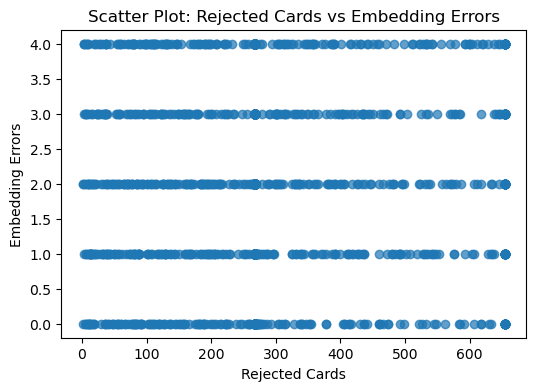

In [35]:
#bivariate Analysis
import itertools
numeric_cols = ['No. of Sheets Used', 'No. of Cards Printed', 'No. of Half Cards',
                'No. of Quarter Cards', 'Accepted Cards', 'Rejected Cards', 'Embedding Errors']

# Loop through all combinations of numeric columns
for x_col, y_col in itertools.combinations(numeric_cols, 2):
    plt.figure(figsize=(6,4))
    plt.scatter(df[x_col], df[y_col], alpha=0.7)
    plt.title(f'Scatter Plot: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

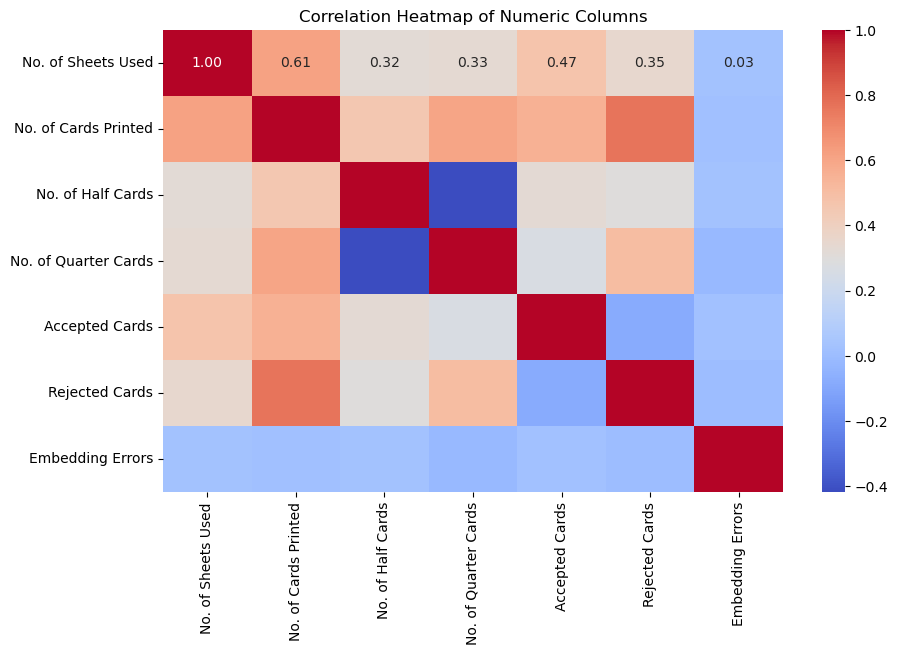

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['No. of Sheets Used', 'No. of Cards Printed', 'No. of Half Cards',
                'No. of Quarter Cards', 'Accepted Cards', 'Rejected Cards', 'Embedding Errors']

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


In [52]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_cols = ['Printer Operator ID', 'Ink Type', 'Paper Type',
                    'Lamination Operator ID', 'Chip Type',
                    'Personalization Operator ID', 'PO_number']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col + '_encoded'] = le.fit_transform(df[col].astype(str))

# Show encoded columns
print(df[[col for col in df.columns if '_encoded' in col]].head())



   Ink Type_encoded  Printer Operator ID_encoded  Paper Type_encoded  \
0                 1                           34                   0   
1                 1                           23                   3   
2                 2                            8                   3   
3                 4                           39                   2   
4                 1                           49                   2   

   Lamination Operator ID_encoded  Chip Type_encoded  \
0                              48                  0   
1                               3                  0   
2                              21                  1   
3                              45                  0   
4                               7                  1   

   Personalization Operator ID_encoded  PO_number_encoded  
0                                   29                  0  
1                                   24                  1  
2                                   11            